# Ejercicios tema 1 
Blanca Cano Camero


In [6]:
# import básicos
from sympy import * # Aunque en las prácticas se han realizado más yo no veo necesario más

## declaraciones
x = symbols("x")

### Ejercicio 1
1.- Demuestre que la ecuación $x^3+4 x^2=10$ tiene una única raíz en el intervalo $[1,2]$. Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas? Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea inferior a $10^{-3}$.

In [7]:
# La siguiente función se anula en donde la ecuación tiene solución
f = x**4 + 4*x**2 - 10

print(f'en f(2)={f.evalf(subs={x:2})} y f(1)={f.evalf(subs={x:1})}')

# análisis de la derivada
df = diff(f,x)
print(f'Los puntos donde se anula l aderiva son {solve(df)}')
print(f'en df(-1)={df.evalf(subs={x:-1})} y df(1)={df.evalf(subs={x:1})}')



en f(2)=22.0000000000000 y f(1)=-5.00000000000000
Los puntos donde se anula l aderiva son [0, -sqrt(2)*I, sqrt(2)*I]
en df(-1)=-12.0000000000000 y df(1)=12.0000000000000


Por ser f un polinomio (clase infinito) y  puesto que la derivada solo se anula en 0 y toma valores positivos en adelante; deducimos que la función $f$ es creciente a partir de 0. 

Además gracias al teorema de Bolzano sabemos que se anulará en un punto por ser $f(1)<0<f(2)$ continua y creciente en ese intervalo.

#### Consideraciones bisección

In [ ]:
import biseccion as bis
# Para tres cifras decimales de precisión el error será (10**(-3))

n3 = bis.calcIterations(1,2,10**(-3))
n5 = bis.calcIterations(1,2,10**(-5))
print(f'El número mínimo de iteraciones para tres cifras es de {n3}')
print(f'El número mínimo de iteraciones para cinco cifras es de {n5}')

def f(x):
    return x**4+ 4*x**2 - 10

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,1,2,10**(-5))
print(f'La solución buscada es {raiz}')

#### Consideraciones Newton-Raphson

In [11]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**4 + 4*x**2 - 10
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,2,10**(-3))

print(f'La solución con newtonRapshon es {raiz}, que se ha alcanzado en {num_iter} iteraciones')

La solución con newtonRapshon es 1.3197190191327715, que se ha alcanzado en 4 iteraciones


## Ejercicio 2

2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos, usando el algoritmo de bisección.

In [16]:
#Esta función se anula en la raíz cúbica de 25 
f = x**3 -25


print(f'en f(2)={f.evalf(subs={x:2})} y f(3)={f.evalf(subs={x:3})}')

# análisis de la derivada
df = diff(f,x)
print(f'Los puntos donde se anula la aderiva son {roots(df)}')
print(f'en df(-1)={df.evalf(subs={x:-1})} y df(1)={df.evalf(subs={x:1})}')



en f(2)=-17.0000000000000 y f(3)=2.00000000000000
Los puntos donde se anula la aderiva son {0: 2}
en df(-1)=3.00000000000000 y df(1)=3.00000000000000


Por tanto (Como era completamente de esperar) la función es creciente a partir de 0 y gracias a bolzano en la semirecta real positiva existirá una única solución.

In [21]:
#la calculamos por bisección
def f(x):
    return x**3 -25

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,2,3,10**(-2))
print(f'La solución buscada es {raiz} donde (25^(1/3)= {25**(1/3)}) ')

La solución buscada es 2.9296875 donde (25^(1/3)= 2.924017738212866) 


## Ejercicio 3

3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con precisión $10^{-5}$ , partiendo de
un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10 cos x+x=0$.


#### i) $x^3-x-1 = 0$  en $[1,2]$.
$f(x) = x^3-x-1$
Su derivada es $x^2 -1$ positiva en tal intervalo y crecente, por tanto habrá una solucío a lo más. 
$f(1)<0<f(2)$ que por continuidad y bolzano tenemos la certeza de que la solución será única.

La función netonRaphsonSinInicio directamente coloca la semilla en su sitio usando el criterio de la segunda derivada. 

In [31]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**3-x-1
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,2,10**(-5), 10**(-5))
print(f'La solución buscada es {raiz}')

La solución buscada es 1.3247190494171253


#### ii) $3x=2+x^2-e^x$.

$x^2 -3x +2 =  e^x$

A ojo, casi sin querer se ve que $x^2 -3x +2 = (x-1)(x-2)$
por tanto sabemos que la parábola tomará valores negarivos entre $(1,2)$ y sabemos que la exponencial es estrictamente positiva y de crecimiento mucho más rápido,a partir de uno, antes de eso será aproximadamente 0.  así que de manera intuitiva habrá una solución en $(-\infty,1)$ cercana al uno. 

Puede comprobarse la intuición si representamos la función. 


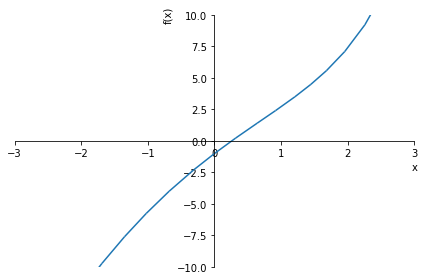

In [38]:
f = exp(x)-x**2 +  3*x -2
plot(f,ylim=(-10,10), xlim=(-3, 3))


Además la segunda derivada de $f=exp(x)-x**2 +  3*x -2$ será $f'' = exp(x) - 2$

Que en es positiva en 1 al igual que la función, así que aplicando el critero de los signos podemos partir de 1 que con el método de newton raphson será convergente. 

Vamos a ellos: 


In [40]:
from newtonRaphson import newtonRaphson
f=exp(x)-x**2 +  3*x -2
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,10**(-5), 10**(-5))
print(f'La solución buscada es {raiz}, se han realizado {num_iter} iteraciones')

La solución buscada es 0.2575302854263488, se han realizado 4 iteraciones


#### iii) $x^2+10 cos x+x=0$.

En este caso tenemos que tener más cuidado, porque tenemos una parábola $x(x+1)$ y una función periódica, por tanto a lo sumo podemos tener dos soluciones y no queremos dejarnos ninguna. 

Pero vamos a aprovechar las herraminetas gráficas para ver el número de solucionesy su intervalo.

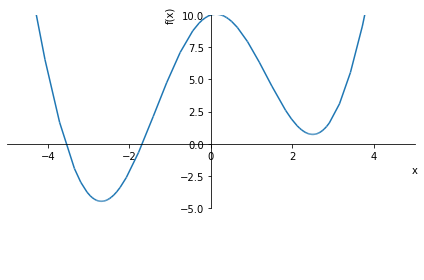

In [56]:
f = x**2 + 10*cos(x) + x
plot(f,ylim=(-10,10), xlim=(-5, 5))

Podemos ver que existen dos soluciones, cada respectivamente en $(-4,-3)$ y $(-2, -1)$, así que ya estamos preparados para utilizar nuestra implementación de Newton-Raphson. 

In [63]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**2 + 10*cos(x) + x
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,-2,-1,10**(-5), 10**(-5))
print(f'La solución entre (-2,-1)buscada es {raiz},que se ha alcanzado por {ms_salida}, en  {num_iter} iteraciones.')

raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,-4,-3,10**(-5), 10**(-10))
print(f'La solución entre (-4,-3)buscada es {raiz}  por {ms_salida}, en  {num_iter} iteraciones.')

La solución entre (-2,-1)buscada es -1.6869398658093508,que se ha alcanzado por precision, en  4 iteraciones.
La solución entre (-4,-3)buscada es -3.5623314972388327  por tolerancia, en  4 iteraciones.


## Ejercicio 4

4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos, y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$,
partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

### Solución


In [76]:

# BISECCIÓN
import biseccion as bis
# Para cuatro cifras decimales de precisión el error será (10**(-4))
n4 = bis.calcIterations(0,1,10**(-4))
print('Bisección')
print(f'El número mínimo de iteraciones en bisección para cuaro cifras será de {n3}')


def f(x):
    return 3* x**2 + exp(x)-1

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,0,1,10**(-4))
print(f'La solución a priori con bisección es {raiz}')


## NEWTON-RAPHSON
from newtonRaphson import newtonRaphson
f  = 3* x**2 + exp(x)-1
raiz, ms_salida, num_iter = newtonRaphson(f,0,10**(-4), 10**(-4))
print(f'NEWTON-RAPHSON: La solución buscada es {raiz} con {num_iter} iteraciones.')

Bisección
El número mínimo de iteraciones en bisección para cuaro cifras será de 10.0
La solución a priori con bisección es 6.103515625e-05
NEWTON-RAPHSON: La solución buscada es 0.0 con 1 iteraciones.


## Ejercicio 5
5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.
### caso i

In [94]:
fi = x**7 - x**4 +2

print(f'Las soluciones reales y complejas de {fi} son:')
complexN = solve(fi, x)
for i in complexN:
    print(N(i))
 


Las soluciones reales y complejas de x**7 - x**4 + 2 son:
-1.00000000000000
-0.713102145851293 - 0.98823188827156*I
-0.713102145851293 + 0.98823188827156*I
1.06110281046036 - 0.376384046559108*I
1.06110281046036 + 0.376384046559108*I
0.151999335390936 - 1.01945594669063*I
0.151999335390936 + 1.01945594669063*I


### caso ii
Hemos representado esta función en el intervalo $[-2.5,2.5]$ para valores fuera de ese intervalo no existe ninguna solución, pues el coseno tiene una amplitud de 1 y en para valores $N < -2.5$ se tiene que $N^7 -3 < -1 <-cos(N)$ y apara $N> 2.5$ se tiene que $N^7>4 > - cos(N) + 3$ 

Además la solución estará próxima a 1, un dato ideal para utilzar `nsolve`.

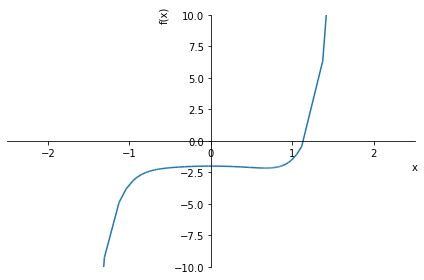

La raíz para x**7 + cos(x) - 3 es 1.14545980727001


In [98]:
# segunda
fii = x**7 + cos(x) -3
plot(fii, xlim=(-2.5,2.5), ylim=(-10, 10) )
# Por tanto calcula la única solución 
sol = nsolve(fii, 1)

print(f'La raíz para {fii} es {sol}')